In [1]:
# Necessary import evil
%matplotlib inline
from physt import histogram, binnings, special
import numpy as np
import matplotlib.pyplot as plt

## Polar histogram

In [2]:
# Generate some points in the Cartesian coordinates
np.random.seed(42)

x = np.random.rand(100000)  
y = np.random.rand(100000)

In [3]:
hist = special.polar_histogram(x, y, 20, 30)
hist

PolarHistogram(bins=(20, 30), total=100000)

In [4]:
# Standard axes names
hist.axis_names

('r', 'phi')

In [5]:
## Using transformed / untransformed values
print("Non-transformed", hist.find_bin((0.1, 1)))
print("Transformed", hist.find_bin((0.1, 1), transformed=True))

print("Non-transformed", hist.find_bin((0.1, 2.7)))
print("Transformed", hist.find_bin((0.1, 2.7), transformed=True))

Non-transformed (14, 7)
Transformed (1, 4)
Non-transformed None
Transformed (1, 12)


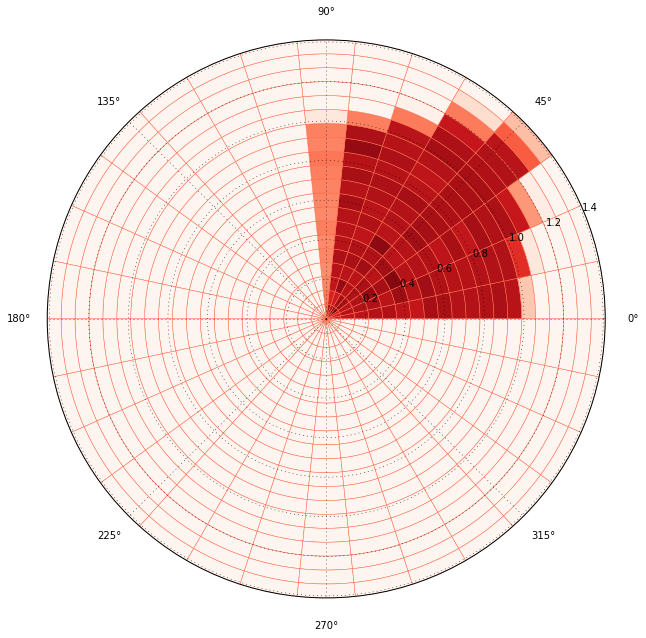

In [6]:
# Simple plotting, similar to Histogram2D
hist.plot.polar_map(density=True, show_zero=True, cmap="Reds", lw=0.5, figsize=(10, 10));

### Adding new values

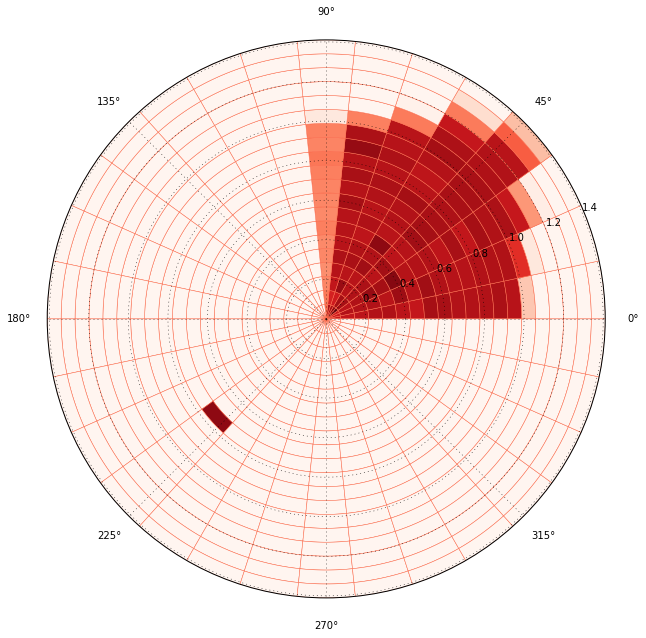

In [7]:
# Add a single, untransformed value
hist.fill((-.5, -.5), weight=1200)
hist.plot.polar_map(density=True, show_zero=True, cmap="Reds", lw=0.5, figsize=(10, 10));

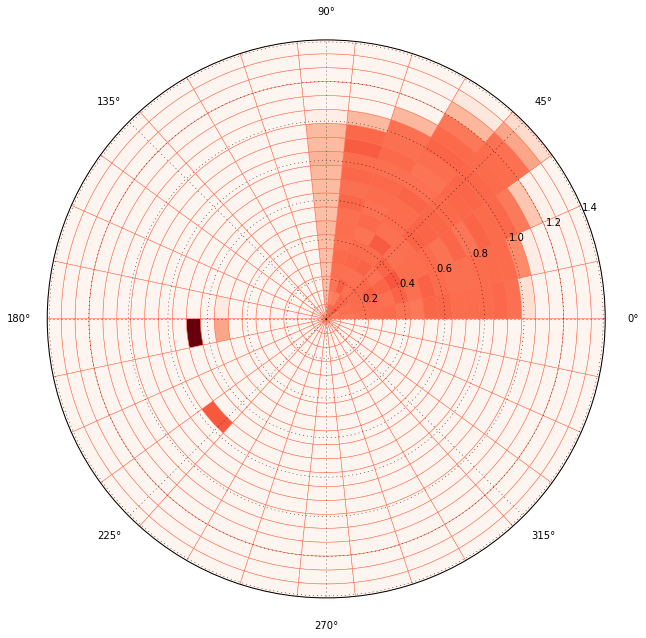

In [8]:
# Add a couple of values, transformed
data = [[.5, 3.05], [.5, 3.2], [.7, 3.3]]
weights = [100, 500, 2000]

hist.fill_n(data, weights=weights, transformed=True)
hist.plot.polar_map(density=True, show_zero=True, cmap="Reds", lw=0.5, figsize=(10, 10));

### Projections

The projections are stored using specialized Histogram1D subclasses that keep (in the case of radial) information about the proper bin sizes.

RadialHistogram(bins=20, total=103800.0)

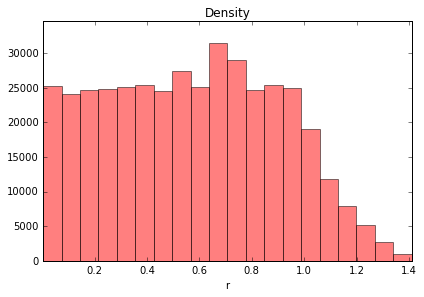

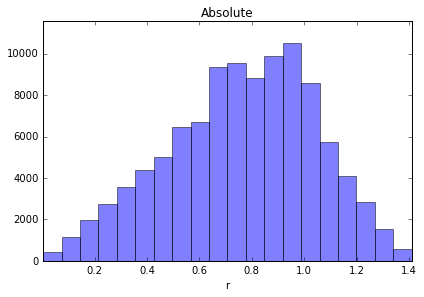

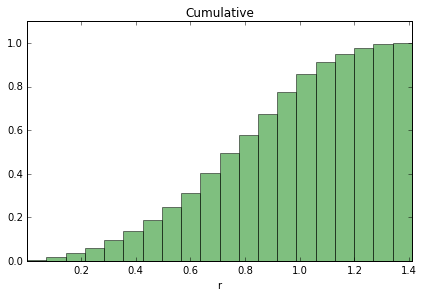

In [9]:
radial = hist.projection("r")
radial.plot(density=True, color="red", alpha=0.5).set_title("Density")
radial.plot(label="absolute", color="blue", alpha=0.5).set_title("Absolute")
radial.plot(label="cumulative", cumulative=True, density=True, color="green", alpha=0.5).set_title("Cumulative")
radial

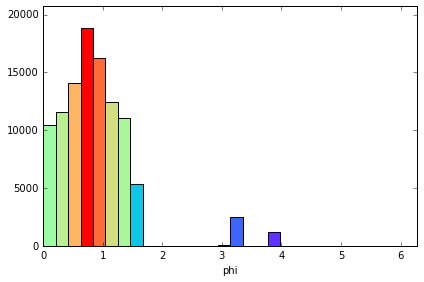

In [10]:
hist.projection("phi").plot(cmap="rainbow")

## Cylindrical histogram
To be implemented

## Spherical histogram
To be implemented

In [11]:
data = np.random.rand(100, 3)
h = special.spherical_histogram(data)

In [14]:
# This of course does not work
h.plot()

RuntimeError: No histogram type is supported for SphericalHistogram